In [1]:
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
import pandas as pd
# from keras.models import Sequential
# from keras.layers import Dense, Activation

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

In [58]:
roo = '../Data/roo1.csv'
df  = pd.read_csv(roo)

data      = df.copy()
train_set = data.sample(frac=0.80645)
test_set  = data.drop(train_set.index)

print(train_set.shape,test_set.shape)

(16129, 99) (3871, 99)


In [59]:
print(train_set.head())
print(train_set.columns)


       Acedamic percentage in Operating Systems  percentage in Algorithms  \
6766                                         72                        72   
10548                                        67                        69   
1810                                         77                        94   
13298                                        77                        86   
1616                                         72                        78   

       Percentage in Programming Concepts  Percentage in Software Engineering  \
6766                                   73                                  89   
10548                                  78                                  78   
1810                                   82                                  72   
13298                                  69                                  85   
1616                                   89                                  90   

       Percentage in Computer Networks  Percentage

In [60]:
print(train_set.isnull().sum())

Acedamic percentage in Operating Systems     0
percentage in Algorithms                     0
Percentage in Programming Concepts           0
Percentage in Software Engineering           0
Percentage in Computer Networks              0
                                            ..
Suggested Job Role_Database Administrator    0
Suggested Job Role_Project Manager           0
Suggested Job Role_Security Administrator    0
Suggested Job Role_Software Developer        0
Suggested Job Role_Technical Support         0
Length: 99, dtype: int64


In [61]:
print(train_set.dtypes.value_counts())

int64    99
Name: count, dtype: int64


In [62]:
print(train_set.describe())

       Acedamic percentage in Operating Systems  percentage in Algorithms  \
count                              16129.000000              16129.000000   
mean                                  77.029264                 76.851882   
std                                   10.090729                 10.125524   
min                                   60.000000                 60.000000   
25%                                   68.000000                 68.000000   
50%                                   77.000000                 77.000000   
75%                                   86.000000                 86.000000   
max                                   94.000000                 94.000000   

       Percentage in Programming Concepts  Percentage in Software Engineering  \
count                        16129.000000                        16129.000000   
mean                            77.051026                           77.125178   
std                             10.138357                      

In [39]:
print(train_set.columns.tolist())

['Acedamic percentage in Operating Systems', 'percentage in Algorithms', 'Percentage in Programming Concepts', 'Percentage in Software Engineering', 'Percentage in Computer Networks', 'Percentage in Electronics Subjects', 'Percentage in Computer Architecture', 'Percentage in Mathematics', 'Percentage in Communication skills', 'Hours working per day', 'Logical quotient rating', 'hackathons', 'coding skills rating', 'public speaking points', 'can work long time before system?_no', 'can work long time before system?_yes', 'self-learning capability?_no', 'self-learning capability?_yes', 'Extra-courses did_no', 'Extra-courses did_yes', 'certifications_app development', 'certifications_distro making', 'certifications_full stack', 'certifications_hadoop', 'certifications_information security', 'certifications_machine learning', 'certifications_python', 'certifications_r programming', 'certifications_shell programming', 'workshops_cloud computing', 'workshops_data science', 'workshops_database

In [40]:
print(test_set.columns.tolist())

['Acedamic percentage in Operating Systems', 'percentage in Algorithms', 'Percentage in Programming Concepts', 'Percentage in Software Engineering', 'Percentage in Computer Networks', 'Percentage in Electronics Subjects', 'Percentage in Computer Architecture', 'Percentage in Mathematics', 'Percentage in Communication skills', 'Hours working per day', 'Logical quotient rating', 'hackathons', 'coding skills rating', 'public speaking points', 'can work long time before system?_no', 'can work long time before system?_yes', 'self-learning capability?_no', 'self-learning capability?_yes', 'Extra-courses did_no', 'Extra-courses did_yes', 'certifications_app development', 'certifications_distro making', 'certifications_full stack', 'certifications_hadoop', 'certifications_information security', 'certifications_machine learning', 'certifications_python', 'certifications_r programming', 'certifications_shell programming', 'workshops_cloud computing', 'workshops_data science', 'workshops_database

In [63]:
def add_label_column(df):
    label_columns = [col for col in df.columns if col.startswith('Suggested Job Role_')]
    df['Label'] = df[label_columns].idxmax(axis=1).str.replace('Suggested Job Role_', '')
    return df

In [64]:
train_set = add_label_column(train_set)
test_set = add_label_column(test_set)

In [65]:
print(test_set.columns.tolist())
print(test_set.columns.tolist())

['Acedamic percentage in Operating Systems', 'percentage in Algorithms', 'Percentage in Programming Concepts', 'Percentage in Software Engineering', 'Percentage in Computer Networks', 'Percentage in Electronics Subjects', 'Percentage in Computer Architecture', 'Percentage in Mathematics', 'Percentage in Communication skills', 'Hours working per day', 'Logical quotient rating', 'hackathons', 'coding skills rating', 'public speaking points', 'can work long time before system?_no', 'can work long time before system?_yes', 'self-learning capability?_no', 'self-learning capability?_yes', 'Extra-courses did_no', 'Extra-courses did_yes', 'certifications_app development', 'certifications_distro making', 'certifications_full stack', 'certifications_hadoop', 'certifications_information security', 'certifications_machine learning', 'certifications_python', 'certifications_r programming', 'certifications_shell programming', 'workshops_cloud computing', 'workshops_data science', 'workshops_database

In [66]:
print("Train labels:", train_set['Label'].unique())
print("Test labels:", test_set['Label'].unique())

print("Train label counts:")
print(train_set['Label'].value_counts())

print("\nTest label counts:")
print(test_set['Label'].value_counts())

Train labels: ['Business Intelligence Analyst' 'Software Developer' 'Project Manager'
 'Technical Support' 'Security Administrator' 'Database Administrator']
Test labels: ['Security Administrator' 'Technical Support' 'Database Administrator'
 'Business Intelligence Analyst' 'Project Manager' 'Software Developer']
Train label counts:
Label
Project Manager                  3325
Software Developer               3188
Business Intelligence Analyst    3153
Security Administrator           2785
Technical Support                2285
Database Administrator           1393
Name: count, dtype: int64

Test label counts:
Label
Software Developer               780
Project Manager                  774
Business Intelligence Analyst    736
Security Administrator           683
Technical Support                547
Database Administrator           351
Name: count, dtype: int64


In [67]:
# Drop one-hot encoded label columns from features
label_columns = [
    'Suggested Job Role_Project Manager',
    'Suggested Job Role_Software Developer',
    'Suggested Job Role_Business Intelligence Analyst',
    'Suggested Job Role_Security Administrator',
    'Suggested Job Role_Technical Support',
    'Suggested Job Role_Database Administrator'
]

X_train = train_set.drop(columns=label_columns + ['Label'])
y_train = train_set['Label']

X_test = test_set.drop(columns=label_columns + ['Label'])
y_test = test_set['Label']

In [68]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (16129, 93)
y_train shape: (16129,)
X_test shape: (3871, 93)
y_test shape: (3871,)


In [69]:
print(train_set.isnull().sum())

Acedamic percentage in Operating Systems     0
percentage in Algorithms                     0
Percentage in Programming Concepts           0
Percentage in Software Engineering           0
Percentage in Computer Networks              0
                                            ..
Suggested Job Role_Project Manager           0
Suggested Job Role_Security Administrator    0
Suggested Job Role_Software Developer        0
Suggested Job Role_Technical Support         0
Label                                        0
Length: 100, dtype: int64


In [24]:
print(train_set.isnull().sum().sum())  # total missing values
print(test_set.isnull().sum().sum())

0
0


In [70]:
print(train_set.describe(include='all').transpose())


                                             count unique              top  \
Acedamic percentage in Operating Systems   16129.0    NaN              NaN   
percentage in Algorithms                   16129.0    NaN              NaN   
Percentage in Programming Concepts         16129.0    NaN              NaN   
Percentage in Software Engineering         16129.0    NaN              NaN   
Percentage in Computer Networks            16129.0    NaN              NaN   
...                                            ...    ...              ...   
Suggested Job Role_Project Manager         16129.0    NaN              NaN   
Suggested Job Role_Security Administrator  16129.0    NaN              NaN   
Suggested Job Role_Software Developer      16129.0    NaN              NaN   
Suggested Job Role_Technical Support       16129.0    NaN              NaN   
Label                                        16129      6  Project Manager   

                                           freq       mean     

In [71]:
# Filter numeric columns only
numeric_df = df.select_dtypes(include=['number'])

# Find columns where all values are within [0, 100]
cols_in_0_100_range = [
    col for col in numeric_df.columns
    if numeric_df[col].min() >= 0 and numeric_df[col].max() <= 100
]

print("✅ Columns with all values in the range 0–100:")
print(cols_in_0_100_range)

✅ Columns with all values in the range 0–100:
['Acedamic percentage in Operating Systems', 'percentage in Algorithms', 'Percentage in Programming Concepts', 'Percentage in Software Engineering', 'Percentage in Computer Networks', 'Percentage in Electronics Subjects', 'Percentage in Computer Architecture', 'Percentage in Mathematics', 'Percentage in Communication skills', 'Hours working per day', 'Logical quotient rating', 'hackathons', 'coding skills rating', 'public speaking points', 'can work long time before system?_no', 'can work long time before system?_yes', 'self-learning capability?_no', 'self-learning capability?_yes', 'Extra-courses did_no', 'Extra-courses did_yes', 'certifications_app development', 'certifications_distro making', 'certifications_full stack', 'certifications_hadoop', 'certifications_information security', 'certifications_machine learning', 'certifications_python', 'certifications_r programming', 'certifications_shell programming', 'workshops_cloud computing',

In [72]:
def is_in_range_0_100(series):
    return series.dropna().between(0, 100).all()

def is_not_one_hot(series):
    # Checks if the column is not just 0 and 1 values (i.e., not one-hot encoded)
    return not (series.min() == 0 and series.max() == 1)

numeric_0_100_cols = []
for col in train_set.columns:
    if pd.api.types.is_numeric_dtype(train_set[col]):
        if is_in_range_0_100(train_set[col]) and is_not_one_hot(train_set[col]):
            numeric_0_100_cols.append(col)

print("Columns with values in 0-100 range (likely marks) and not one-hot:")
print(numeric_0_100_cols)

# Show first 5 rows of these columns for inspection
print(train_set[numeric_0_100_cols].head())

Columns with values in 0-100 range (likely marks) and not one-hot:
['Acedamic percentage in Operating Systems', 'percentage in Algorithms', 'Percentage in Programming Concepts', 'Percentage in Software Engineering', 'Percentage in Computer Networks', 'Percentage in Electronics Subjects', 'Percentage in Computer Architecture', 'Percentage in Mathematics', 'Percentage in Communication skills', 'Hours working per day', 'Logical quotient rating', 'hackathons', 'coding skills rating', 'public speaking points']
       Acedamic percentage in Operating Systems  percentage in Algorithms  \
6766                                         72                        72   
10548                                        67                        69   
1810                                         77                        94   
13298                                        77                        86   
1616                                         72                        78   

       Percentage in Progr

In [73]:
train_set.describe()

,Acedamic percentage in Operating Systems,percentage in Algorithms,Percentage in Programming Concepts,Percentage in Software Engineering,Percentage in Computer Networks,Percentage in Electronics Subjects,Percentage in Computer Architecture,Percentage in Mathematics,Percentage in Communication skills,Hours working per day,...,worked in teams ever?_no,worked in teams ever?_yes,Introvert_no,Introvert_yes,Suggested Job Role_Business Intelligence Analyst,Suggested Job Role_Database Administrator,Suggested Job Role_Project Manager,Suggested Job Role_Security Administrator,Suggested Job Role_Software Developer,Suggested Job Role_Technical Support
count,16129.000000,16129.000000,16129.000000,16129.000000,16129.000000,16129.000000,16129.000000,16129.000000,16129.000000,16129.000000,...,16129.000000,16129.000000,16129.000000,16129.000000,16129.000000,16129.000000,16129.000000,16129.000000,16129.000000,16129.000000
mean,77.029264,76.851882,77.051026,77.125178,76.898568,76.985182,77.011098,76.911526,76.927584,7.992126,...,0.503131,0.496869,0.494327,0.505673,0.195486,0.086366,0.206150,0.172670,0.197656,0.141670
std,10.090729,10.125524,10.138357,10.085781,10.026849,10.174286,10.070994,10.135683,10.129902,2.595569,...,0.500006,0.500006,0.499983,0.499983,0.396587,0.280913,0.404552,0.377974,0.398244,0.348722
min,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,8.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,86.000000,86.000000,86.000000,86.000000,85.000000,86.000000,86.000000,86.000000,86.000000,10.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,12.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [74]:
def normalize_percentage_columns(df):
    percentage_cols = [col for col in df.columns if 'percentage in' in col.lower()]
    df = df.copy()
    for col in percentage_cols:
        df[col] = (df[col] - 60) / 40  # (value - min) / (max - min)
    return df

# Apply to train_set and test_set
train_set = normalize_percentage_columns(train_set)
test_set = normalize_percentage_columns(test_set)

In [75]:
train_set.describe()

,Acedamic percentage in Operating Systems,percentage in Algorithms,Percentage in Programming Concepts,Percentage in Software Engineering,Percentage in Computer Networks,Percentage in Electronics Subjects,Percentage in Computer Architecture,Percentage in Mathematics,Percentage in Communication skills,Hours working per day,...,worked in teams ever?_no,worked in teams ever?_yes,Introvert_no,Introvert_yes,Suggested Job Role_Business Intelligence Analyst,Suggested Job Role_Database Administrator,Suggested Job Role_Project Manager,Suggested Job Role_Security Administrator,Suggested Job Role_Software Developer,Suggested Job Role_Technical Support
count,16129.000000,16129.000000,16129.000000,16129.000000,16129.000000,16129.000000,16129.000000,16129.000000,16129.000000,16129.000000,...,16129.000000,16129.000000,16129.000000,16129.000000,16129.000000,16129.000000,16129.000000,16129.000000,16129.000000,16129.000000
mean,0.425732,0.421297,0.426276,0.428129,0.422464,0.424630,0.425277,0.422788,0.423190,7.992126,...,0.503131,0.496869,0.494327,0.505673,0.195486,0.086366,0.206150,0.172670,0.197656,0.141670
std,0.252268,0.253138,0.253459,0.252145,0.250671,0.254357,0.251775,0.253392,0.253248,2.595569,...,0.500006,0.500006,0.499983,0.499983,0.396587,0.280913,0.404552,0.377974,0.398244,0.348722
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,6.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.425000,0.425000,0.425000,0.425000,0.425000,0.425000,0.425000,0.425000,0.425000,8.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.650000,0.650000,0.650000,0.650000,0.625000,0.650000,0.650000,0.650000,0.650000,10.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.850000,0.850000,0.850000,0.850000,0.850000,0.850000,0.850000,0.850000,0.850000,12.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [76]:
max_hours = train_set['Hours working per day'].max()
print(f"Maximum hours working per day: {max_hours}")

Maximum hours working per day: 12


In [77]:
def normalize_by_max(df, columns):
    for col in columns:
        max_val = df[col].max()
        if max_val > 0:
            df[col] = df[col] / max_val
        else:
            print(f"Warning: Max value for column '{col}' is {max_val}, skipping normalization.")
    return df

# Columns to normalize
cols_to_normalize = [
    'Hours working per day', 
    'Logical quotient rating', 
    'hackathons', 
    'coding skills rating', 
    'public speaking points'
]

# Apply to train and test sets
train_set = normalize_by_max(train_set, cols_to_normalize)
test_set = normalize_by_max(test_set, cols_to_normalize)

In [78]:
train_set.describe()

,Acedamic percentage in Operating Systems,percentage in Algorithms,Percentage in Programming Concepts,Percentage in Software Engineering,Percentage in Computer Networks,Percentage in Electronics Subjects,Percentage in Computer Architecture,Percentage in Mathematics,Percentage in Communication skills,Hours working per day,...,worked in teams ever?_no,worked in teams ever?_yes,Introvert_no,Introvert_yes,Suggested Job Role_Business Intelligence Analyst,Suggested Job Role_Database Administrator,Suggested Job Role_Project Manager,Suggested Job Role_Security Administrator,Suggested Job Role_Software Developer,Suggested Job Role_Technical Support
count,16129.000000,16129.000000,16129.000000,16129.000000,16129.000000,16129.000000,16129.000000,16129.000000,16129.000000,16129.000000,...,16129.000000,16129.000000,16129.000000,16129.000000,16129.000000,16129.000000,16129.000000,16129.000000,16129.000000,16129.000000
mean,0.425732,0.421297,0.426276,0.428129,0.422464,0.424630,0.425277,0.422788,0.423190,0.666010,...,0.503131,0.496869,0.494327,0.505673,0.195486,0.086366,0.206150,0.172670,0.197656,0.141670
std,0.252268,0.253138,0.253459,0.252145,0.250671,0.254357,0.251775,0.253392,0.253248,0.216297,...,0.500006,0.500006,0.499983,0.499983,0.396587,0.280913,0.404552,0.377974,0.398244,0.348722
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.425000,0.425000,0.425000,0.425000,0.425000,0.425000,0.425000,0.425000,0.425000,0.666667,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.650000,0.650000,0.650000,0.650000,0.625000,0.650000,0.650000,0.650000,0.650000,0.833333,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.850000,0.850000,0.850000,0.850000,0.850000,0.850000,0.850000,0.850000,0.850000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


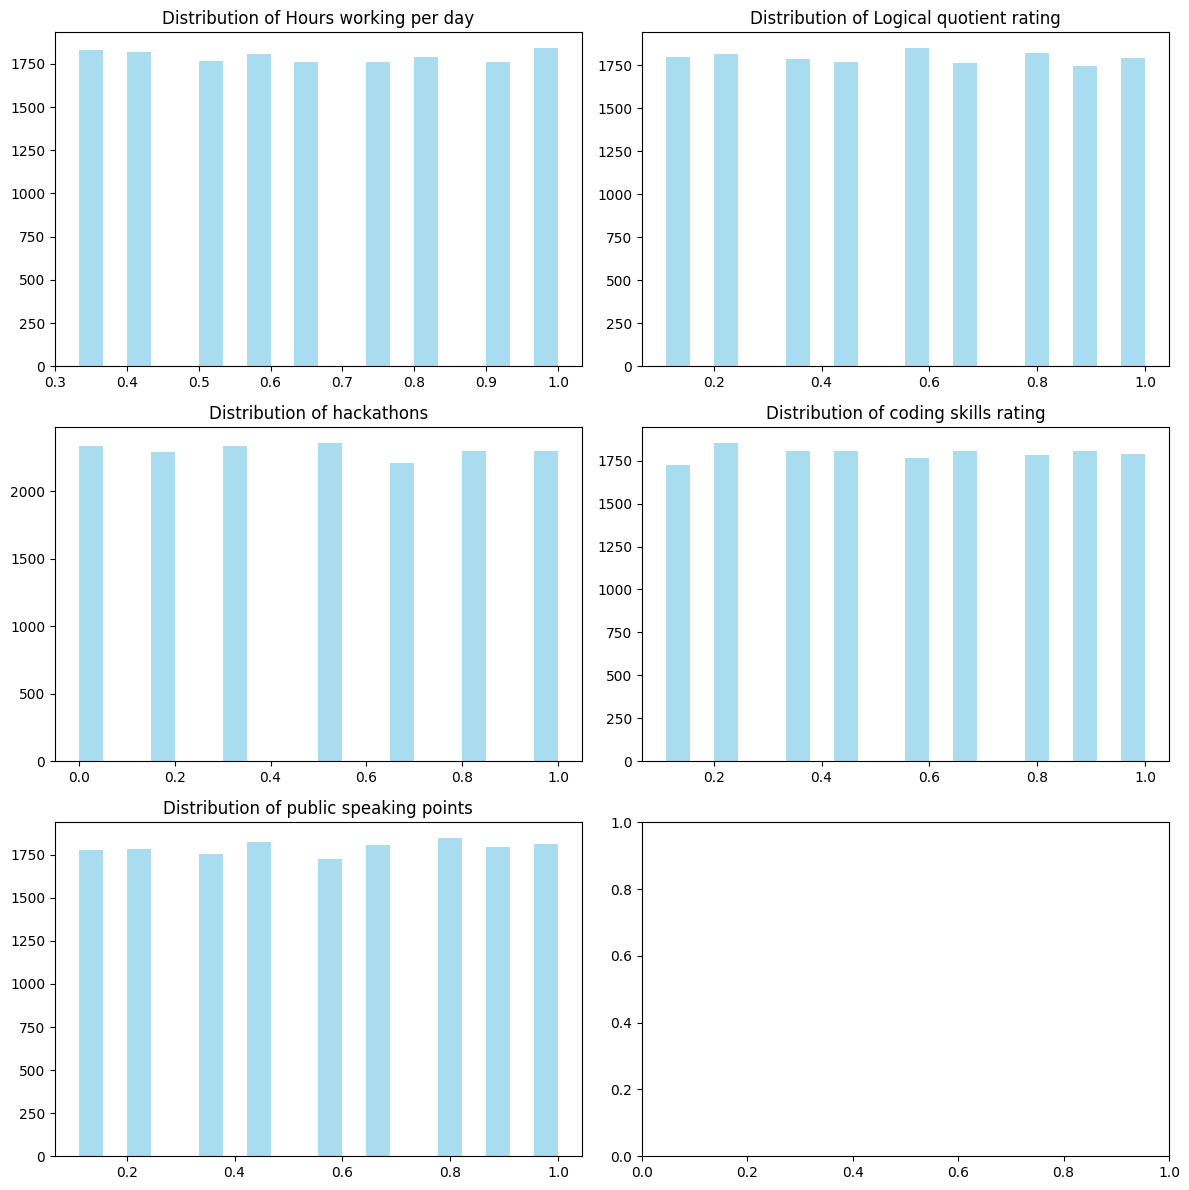

In [79]:
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
axes = axes.flatten()

for i, col in enumerate(cols_to_normalize):
    axes[i].hist(train_set[col], bins=20, color='skyblue', alpha=0.7)
    axes[i].set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

In [55]:
test_set.describe()

,Acedamic percentage in Operating Systems,percentage in Algorithms,Percentage in Programming Concepts,Percentage in Software Engineering,Percentage in Computer Networks,Percentage in Electronics Subjects,Percentage in Computer Architecture,Percentage in Mathematics,Percentage in Communication skills,Hours working per day,...,worked in teams ever?_no,worked in teams ever?_yes,Introvert_no,Introvert_yes,Suggested Job Role_Business Intelligence Analyst,Suggested Job Role_Database Administrator,Suggested Job Role_Project Manager,Suggested Job Role_Security Administrator,Suggested Job Role_Software Developer,Suggested Job Role_Technical Support
count,3871.000000,3871.000000,3871.000000,3871.000000,3871.000000,3871.000000,3871.000000,3871.000000,3871.000000,3871.000000,...,3871.000000,3871.000000,3871.000000,3871.000000,3871.000000,3871.000000,3871.000000,3871.000000,3871.000000,3871.000000
mean,0.769990,0.771160,0.770364,0.770307,0.770757,0.770196,0.770519,0.769153,0.770196,0.661479,...,0.498321,0.501679,0.505812,0.494188,0.195298,0.080858,0.212348,0.175149,0.197882,0.138466
std,0.101453,0.101086,0.101067,0.101367,0.100073,0.102033,0.100526,0.102677,0.101838,0.215799,...,0.500062,0.500062,0.500031,0.500031,0.396481,0.272652,0.409023,0.380143,0.398454,0.345433
min,0.600000,0.600000,0.600000,0.600000,0.600000,0.600000,0.600000,0.600000,0.600000,0.333333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.680000,0.680000,0.680000,0.680000,0.680000,0.680000,0.680000,0.680000,0.680000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.770000,0.770000,0.770000,0.770000,0.770000,0.770000,0.770000,0.770000,0.770000,0.666667,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.860000,0.860000,0.860000,0.860000,0.860000,0.860000,0.860000,0.860000,0.860000,0.833333,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.940000,0.940000,0.940000,0.940000,0.940000,0.940000,0.940000,0.940000,0.940000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [80]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [82]:
y_prob = model.predict_proba(X_test)

In [84]:
from sklearn.metrics import classification_report, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.19271506070782743
                               precision    recall  f1-score   support

Business Intelligence Analyst       0.17      0.25      0.20       736
       Database Administrator       0.00      0.00      0.00       351
              Project Manager       0.20      0.35      0.26       774
       Security Administrator       0.20      0.13      0.16       683
           Software Developer       0.20      0.25      0.22       780
            Technical Support       0.13      0.02      0.04       547

                     accuracy                           0.19      3871
                    macro avg       0.15      0.17      0.15      3871
                 weighted avg       0.17      0.19      0.17      3871



In [85]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# Encode target labels
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

# One-hot encode target
y_train_cat = to_categorical(y_train_enc)
y_test_cat = to_categorical(y_test_enc)

# Build the ANN
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(y_train_cat.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train
history = model.fit(X_train, y_train_cat, epochs=50, batch_size=32, validation_data=(X_test, y_test_cat))

D:\Intern\Group Project 1\CareerGuidance-ml\career-env\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
505/505 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.1933 - loss: 5.9080 - val_accuracy: 0.1999 - val_loss: 1.7675
Epoch 2/50
505/505 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2044 - loss: 1.7723 - val_accuracy: 0.1999 - val_loss: 1.7615
Epoch 3/50
505/505 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2078 - loss: 1.7643 - val_accuracy: 0.1999 - val_loss: 1.7608
Epoch 4/50
505/505 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2090 - loss: 1.7590 - val_accuracy: 0.1999 - val_loss: 1.7608
Epoch 5/50
505/505 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2048 - loss: 1.7560 - val_accuracy: 0.1999 - val_loss: 1.7609
Epoch 6/50
505/505 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2095 - loss: 1.7560 - val_accuracy: 0.1999 - val_loss: 1.7608
Epoch 7/50
505/505 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2123 - loss: 1.7557 - val_accuracy: 0.1999 - val_loss: 1.7608
Epoch 8/50
505/505 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2069 - loss: 1.7547 - val_accuracy: 0.

In [87]:
!pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.9 kB 435.7 kB/s eta 0:00:01
   -------- ------------------------------ 61.4/294.9 kB 544.7 kB/s eta 0:00:01
   -------------------------- ------------- 194.6/294.9 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 1.7 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


C:\Users\user\AppData\Local\Temp\ipykernel_2736\3236768051.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Label', data=train_set, palette='Set2')


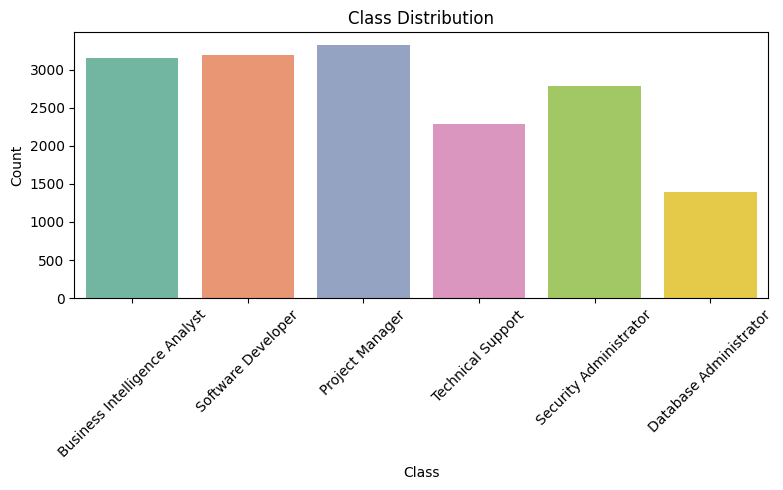

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(x='Label', data=train_set, palette='Set2')

plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [91]:
pip install keras-tuner --upgrade

   ---------------------------------------- 0.0/129.1 kB ? eta -:--:--
   --- ------------------------------------ 10.2/129.1 kB ? eta -:--:--
   --------- ----------------------------- 30.7/129.1 kB 262.6 kB/s eta 0:00:01
   ------------ -------------------------- 41.0/129.1 kB 330.3 kB/s eta 0:00:01
   --------------------------- ----------- 92.2/129.1 kB 525.1 kB/s eta 0:00:01
   -------------------------------------- 129.1/129.1 kB 585.7 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [94]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import keras_tuner as kt

# Define input shape and number of classes based on your data
input_shape = X_train.shape[1]  # Number of features
num_classes = len(y_train.unique())  # Number of unique classes in your label

# Define the hypermodel class
class ANNHyperModel(kt.HyperModel):
    def build(self, hp):
        model = keras.Sequential()
        model.add(layers.Input(shape=(input_shape,)))

        # Tune number of hidden layers
        for i in range(hp.Int('num_layers', 2, 4)):
            units = hp.Int(f'units_{i}', min_value=32, max_value=256, step=32)
            model.add(layers.Dense(units, activation='relu'))
            dropout_rate = hp.Float(f'dropout_{i}', 0.2, 0.5, step=0.1)
            model.add(layers.Dropout(dropout_rate))

        model.add(layers.Dense(num_classes, activation='softmax'))

        optimizer_choice = hp.Choice('optimizer', ['adam', 'rmsprop', 'sgd'])
        lr = hp.Float('learning_rate', 1e-4, 1e-2, sampling='log')

        if optimizer_choice == 'adam':
            optimizer = keras.optimizers.Adam(learning_rate=lr)
        elif optimizer_choice == 'rmsprop':
            optimizer = keras.optimizers.RMSprop(learning_rate=lr)
        else:
            optimizer = keras.optimizers.SGD(learning_rate=lr, momentum=0.9)

        model.compile(optimizer=optimizer,
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])
        return model

# Initialize the tuner
tuner = kt.RandomSearch(
    ANNHyperModel(),
    objective='val_accuracy',
    max_trials=20,
    executions_per_trial=2,
    directory='my_dir',
    project_name='ann_tuning'
)

# Run the hyperparameter search
tuner.search(X_train, y_train,
             epochs=20,
             validation_split=0.2,
             batch_size=32)

# Retrieve the best model and hyperparameters
best_model = tuner.get_best_models(num_models=1)[0]
best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]

print("Best hyperparameters:")
print(best_hp.values)

# Evaluate on test set
loss, accuracy = best_model.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy}")


Trial 2 Complete [00h 00m 01s]

Best val_accuracy So Far: None
Total elapsed time: 00h 00m 02s

Search: Running Trial #3

Value             |Best Value So Far |Hyperparameter
2                 |3                 |num_layers
32                |224               |units_0
0.2               |0.4               |dropout_0
160               |128               |units_1
0.3               |0.3               |dropout_1
sgd               |sgd               |optimizer
0.0024736         |0.0017759         |learning_rate
160               |32                |units_2
0.2               |0.2               |dropout_2



Traceback (most recent call last):
  File "D:\Intern\Group Project 1\CareerGuidance-ml\career-env\Lib\site-packages\keras_tuner\src\engine\base_tuner.py", line 274, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "D:\Intern\Group Project 1\CareerGuidance-ml\career-env\Lib\site-packages\keras_tuner\src\engine\base_tuner.py", line 239, in _run_and_update_trial
    results = self.run_trial(trial, *fit_args, **fit_kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\Intern\Group Project 1\CareerGuidance-ml\career-env\Lib\site-packages\keras_tuner\src\engine\tuner.py", line 314, in run_trial
    obj_value = self._build_and_fit_model(trial, *args, **copied_kwargs)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\Intern\Group Project 1\CareerGuidance-ml\career-env\Lib\site-packages\keras_tuner\src\engine\tuner.py", line 233, in _build_and_fit_model
    results = self.hypermodel.fit

RuntimeError: Number of consecutive failures exceeded the limit of 3.
Traceback (most recent call last):
  File "D:\Intern\Group Project 1\CareerGuidance-ml\career-env\Lib\site-packages\keras_tuner\src\engine\base_tuner.py", line 274, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "D:\Intern\Group Project 1\CareerGuidance-ml\career-env\Lib\site-packages\keras_tuner\src\engine\base_tuner.py", line 239, in _run_and_update_trial
    results = self.run_trial(trial, *fit_args, **fit_kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\Intern\Group Project 1\CareerGuidance-ml\career-env\Lib\site-packages\keras_tuner\src\engine\tuner.py", line 314, in run_trial
    obj_value = self._build_and_fit_model(trial, *args, **copied_kwargs)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\Intern\Group Project 1\CareerGuidance-ml\career-env\Lib\site-packages\keras_tuner\src\engine\tuner.py", line 233, in _build_and_fit_model
    results = self.hypermodel.fit(hp, model, *args, **kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\Intern\Group Project 1\CareerGuidance-ml\career-env\Lib\site-packages\keras_tuner\src\engine\hypermodel.py", line 149, in fit
    return model.fit(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\Intern\Group Project 1\CareerGuidance-ml\career-env\Lib\site-packages\keras\src\utils\traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "D:\Intern\Group Project 1\CareerGuidance-ml\career-env\Lib\site-packages\optree\ops.py", line 766, in tree_map
    return treespec.unflatten(map(func, *flat_args))
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: Invalid dtype: object
